In [149]:
import pandas as pd
import numpy as np

In [150]:
df = pd.read_csv('cleaned_data.csv')

In [151]:
df.head(2)

,title,rated,released,runtime,director,writer,actors,plot,language,country,...,boxoffice,response,genre,star,budget,gross,year,internet_movie_database_rating,rotten_tomato_rating,metacritic_rating
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",...,292576195.0,True,Action,Leonardo DiCaprio,160000000.0,836836967.0,2010,8.8,87.0,74.0
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,...,312433331.0,True,Action,Robert Downey Jr.,200000000.0,623933331.0,2010,7.0,72.0,57.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   title                           1774 non-null   object 
 1   rated                           1753 non-null   object 
 2   released                        1774 non-null   object 
 3   runtime                         1774 non-null   int64  
 4   director                        1766 non-null   object 
 5   writer                          1771 non-null   object 
 6   actors                          1774 non-null   object 
 7   plot                            1774 non-null   object 
 8   language                        1771 non-null   object 
 9   country                         1773 non-null   object 
 10  awards                          1654 non-null   object 
 11  metascore                       1774 non-null   float64
 12  imdbrating                      17

In [153]:
df["rated"].fillna("NA", inplace = True)
df["director"].fillna("NA", inplace = True)
df["writer"].fillna("NA", inplace = True)
df["language"].fillna("NA", inplace = True)
df["country"].fillna("NA", inplace = True)
df["awards"].fillna("NA", inplace = True)
df["metascore"].fillna(0, inplace = True)
df["dvd"].fillna("NA", inplace = True)
df["boxoffice"].fillna(0, inplace = True)
df["budget"].fillna(0, inplace = True)
df["gross"].fillna(0, inplace = True)


In [154]:
df.isnull().sum()

title                             0
rated                             0
released                          0
runtime                           0
director                          0
writer                            0
actors                            0
plot                              0
language                          0
country                           0
awards                            0
metascore                         0
imdbrating                        0
imdbvotes                         0
dvd                               0
boxoffice                         0
response                          0
genre                             0
star                              0
budget                            0
gross                             0
year                              0
internet_movie_database_rating    0
rotten_tomato_rating              0
metacritic_rating                 0
dtype: int64

## Data Preprocessing for model

### Adding label column based on IMDB Rating (rating(<5): label 0,rating(>=5 and <8):label1,rating(>8):label2

In [155]:
df['label']=''
for index, row in df.iterrows():
    if (row['imdbrating']<5):
        df.loc[index, 'label']=0
    elif (row['imdbrating']>=5)&(row['imdbrating']<8):
        df.loc[index, 'label']=1
    elif (row['imdbrating']>=8):
        df.loc[index, 'label']=2

In [156]:
df['label'].value_counts()

1    1622
0      78
2      74
Name: label, dtype: int64

In [157]:
df['label'].dtype

dtype('O')

In [158]:
df['label']=pd.to_numeric(df['label'])
df['label'].fillna(0,inplace=True)
df['label']=df['label'].astype('int')

In [159]:
df['label']

0       2
1       1
2       2
3       1
4       1
       ..
1769    1
1770    0
1771    0
1772    0
1773    1
Name: label, Length: 1774, dtype: int64

### Dropping Columns not required for the model

In [160]:
df=df.drop(['title','released','plot','awards','metascore','imdbrating' ,'imdbvotes','dvd',
           'boxoffice','response','gross', 'year','internet_movie_database_rating',
           'rotten_tomato_rating','metacritic_rating'],axis=1)                                                 
df.columns

Index(['rated', 'runtime', 'director', 'writer', 'actors', 'language',
       'country', 'genre', 'star', 'budget', 'label'],
      dtype='object')

### Create Function for one hot encoding of writer, actors,language, country columns

In [161]:
def one_hot_encode(column,new_col_names):
    
    for index, row in df.iterrows():
        item_names=str(row[column]).split(',')
        for y in item_names:
            y=y.strip()
            if y in new_col_names:
                df.loc[index, y]=1
        

### One Hot Endcoding: Country

In [162]:
from collections import Counter
# Find most common country names
countries=df['country'].to_list()

country_list=[]

for x in countries:
    
        country_array = str(x).split(',')
        for y in country_array:
            y=y.strip()
            country_list.append(y)
most_common=Counter(country_list).most_common(10)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('country',new_col_names)

### One Hot Encoding : Language

In [163]:
languages=df['language'].to_list()

language_list=[]

for x in languages:
    
        language_array = str(x).split(',')
        for y in language_array:
            y=y.strip()
            language_list.append(y)
most_common=Counter(language_list).most_common(15)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('language',new_col_names)


### One Hot Encoding :writer

In [164]:
writers=df['writer'].to_list()

writer_list=[]

for x in writers:
    
        writer_array = str(x).split(',')
        for y in writer_array:
            y=y.strip()
            writer_list.append(y)
most_common=Counter(writer_list).most_common(50)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('writer',new_col_names)

### One Hot Encoding :actors

In [165]:
actors=df['actors'].to_list()

actor_list=[]

for x in actors:
    
        actor_array = str(x).split(',')
        for y in actor_array:
            y=y.strip()
            actor_list.append(y)
most_common=Counter(actor_list).most_common(50)
new_col_names=[]
for item in most_common:
    new_col_names.append(item[0])
    df[item[0]]=""
one_hot_encode('actors',new_col_names)



In [166]:
df=df.drop(['country','language','writer','actors'],axis=1)

In [167]:
df.columns

Index(['rated', 'runtime', 'director', 'genre', 'star', 'budget', 'label',
       'United States', 'United Kingdom', 'France',
       ...
       'Jessica Chastain', 'Chris Evans', 'Mark Ruffalo', 'Nicolas Cage',
       'Chloë Grace Moretz', 'Johnny Depp', 'Kristen Stewart', 'Amy Adams',
       'Robert De Niro', 'Chris Pine'],
      dtype='object', length=132)

In [168]:
df.shape

(1774, 132)

In [13]:
df.head(5)

,title,rated,released,runtime,director,writer,actors,plot,language,country,...,Jessica Chastain,Chris Evans,Mark Ruffalo,Nicolas Cage,Chloë Grace Moretz,Johnny Depp,Kristen Stewart,Amy Adams,Robert De Niro,Chris Pine
0,Inception,PG-13,2010-07-16,148,Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",A thief who steals corporate secrets through t...,"English, Japanese, French","United Kingdom, United States",...,,,,,,,,,,
1,Iron Man 2,PG-13,2010-05-07,124,Jon Favreau,"Justin Theroux, Stan Lee, Don Heck","Robert Downey Jr., Mickey Rourke, Gwyneth Paltrow",With the world now aware of his identity as Ir...,"English, French, Russian",United States,...,,,,,,,,,,
2,Shutter Island,R,2010-02-19,138,Martin Scorsese,"Laeta Kalogridis, Dennis Lehane","Leonardo DiCaprio, Emily Mortimer, Mark Ruffalo","In 1954, a U.S. Marshal investigates the disap...","English, German",United States,...,,,1,,,,,,,
3,Scott Pilgrim vs. the World,PG-13,2010-08-13,112,Edgar Wright,"Michael Bacall, Edgar Wright, Bryan Lee O'Malley","Michael Cera, Mary Elizabeth Winstead, Kieran ...","In a magically realistic version of Toronto, a...",English,"United States, United Kingdom, Canada, Japan",...,,,,,,,,,,
4,Grown Ups,PG-13,2010-06-25,102,Dennis Dugan,"Adam Sandler, Fred Wolf","Adam Sandler, Salma Hayek, Kevin James",After their high school basketball coach passe...,"English, Spanish",United States,...,,,,,,,,,,


In [170]:
df.fillna(0,inplace=True)


In [171]:
df.isnull().sum()

rated              0
runtime            0
director           0
genre              0
star               0
                  ..
Johnny Depp        0
Kristen Stewart    0
Amy Adams          0
Robert De Niro     0
Chris Pine         0
Length: 132, dtype: int64

In [ ]:
#df.to_csv('one_hot_encode.csv',index=False)

In [182]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


### Reducing type of rated by merging two or more types in one

In [183]:
df.loc[df['rated']=='TV-MA', 'rated'] = 'R'
df.loc[df['rated']=='NC-17', 'rated'] = 'R'
df.loc[df['rated']=='TV-14', 'rated'] = 'PG-13'
df.loc[df['rated']=='TV-PG', 'rated'] = 'PG'
df.loc[df['rated']=='Unrated', 'rated'] = 'NA'

In [184]:
stars = df.star.value_counts()
stars_filter = stars[stars< 5]


In [185]:
stars_replace = stars[stars<10].index.to_list()
for star in stars_replace:
  df['star'] =  df['star'].replace(star,'other')

df['star'].value_counts() 

other                  1673
Mark Wahlberg            13
Matt Damon               12
Matthew McConaughey      12
Liam Neeson              12
Steve Carell             12
Adam Sandler             10
Channing Tatum           10
Jesse Eisenberg          10
Robert Downey Jr.        10
Name: star, dtype: int64

### Splitting Feature and Target Columns

In [186]:
df2=df.drop('label',axis=1)
y=df['label']

In [187]:
X=pd.get_dummies(df2)
X.shape

(1774, 1397)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [189]:
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Trying RandomForest Classifier

In [190]:
model=RandomForestClassifier (random_state=1,n_estimators=500)
model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [191]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [192]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:1.0,testing_score:0.9099437148217636


### Trying SVC

In [193]:
from sklearn.svm import SVC

In [194]:
model=SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [195]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [196]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.9307010475423045,testing_score:0.9136960600375235


### Trying K-Nearestneighbors

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
train_scores=[]
test_scores=[]

In [199]:
for k in range (1,20,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_score=knn.score(X_train_scaled,y_train)
    test_score=knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

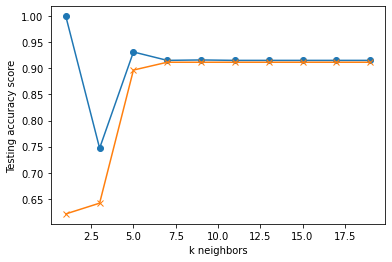

In [200]:
import matplotlib.pyplot as plt
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [208]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled,y_train)


KNeighborsClassifier(n_neighbors=8)

In [209]:
training_score = knn.score(X_train_scaled, y_train)
testing_score = knn.score(X_test_scaled, y_test)

In [210]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.9178082191780822,testing_score:0.9118198874296435


### Trying other ensemble methods

In [211]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier

### ExtraTreesClassifier

In [212]:
model=ExtraTreesClassifier()
model.fit(X_train_scaled,y_train)

ExtraTreesClassifier()

In [213]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [214]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:1.0,testing_score:0.8949343339587242


### AdaBoostClassifier

In [215]:
model=AdaBoostClassifier()
model.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [216]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [217]:
print(f"training_score:{training_score},testing_score:{testing_score}")

training_score:0.8501208702659145,testing_score:0.8667917448405253
